In [1]:
# SPARK_HOME path Test
import findspark
findspark.init()
import pyspark
findspark.find()

'C:\\Users\\DBREDDY\\Spark'

In [2]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = pyspark.SparkConf().setAppName('Transformations_Actions').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

In [4]:
x = sc.parallelize([1,2,3,4,5,6])
print(x.getNumPartitions())
print(x.collect())

1
[1, 2, 3, 4, 5, 6]


In [6]:
y = sc.parallelize([1,2,3,4,5,6],3)
print(y.getNumPartitions())
print(y.collect())
print(y.glom().collect())

3
[1, 2, 3, 4, 5, 6]
[[1, 2], [3, 4], [5, 6]]


In [7]:
a = sc.parallelize([10,20,30,40,50,60])
print(dir(a))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_computeFractionForSampleSize', '_defaultReducePartitions', '_id', '_is_barrier', '_jrdd', '_jrdd_deserializer', '_memory_limit', '_pickled', '_reserialize', '_to_java_object_rdd', 'aggregate', 'aggregateByKey', 'barrier', 'cache', 'cartesian', 'checkpoint', 'coalesce', 'cogroup', 'collect', 'collectAsMap', 'collectWithJobGroup', 'combineByKey', 'context', 'count', 'countApprox', 'countApproxDistinct', 'countByKey', 'countByValue', 'ctx', 'distinct', 'filter', 'first', 'flatMap', 'flatMapValues', 'fold', 'foldByKey', 'foreach', 'foreachPartition', 'fullOuterJoin', 'getCheckpointFile', 'getNumPartitions', 'getStorageLe

# ----------------Actions----------------

In [8]:
a = sc.parallelize([10,20,30,40,50,60])
a.collect()

[10, 20, 30, 40, 50, 60]

# min

In [4]:
a.min()

10

# max

In [5]:
a.max()

60

# mean

In [6]:
a.mean()

35.0

# first

In [7]:
a.first()

10

# count

In [8]:
a.count()

6

# reduce

In [9]:
a.reduce(lambda a,b:a+b)

210

In [10]:
from operator import add
a.reduce(add)

210

# collect

In [11]:
a.collect()

[10, 20, 30, 40, 50, 60]

# take

In [12]:
a.take(3)

[10, 20, 30]

# takeSample

In [9]:
print(a.takeSample(False,3))

[60, 40, 30]


# takeOrdered

In [10]:
a.takeOrdered(3, key=lambda x: -x)

[60, 50, 40]

In [15]:
a.takeOrdered(3, key=lambda x: +x)

[10, 20, 30]

# saveAsTextFile

In [12]:
a.saveAsTextFile('a.txt')

# countByKey & countByValue

In [76]:
b = sc.parallelize([("a", 1), ("b", 1), ("a", 1)])
print(b.countByKey())
print(b.countByValue())

defaultdict(<class 'int'>, {'a': 2, 'b': 1})
defaultdict(<class 'int'>, {('a', 1): 2, ('b', 1): 1})


# aggregate

In [13]:
seqOp = (lambda x, y: (x[0] + y, x[1] + 1))
combOp = (lambda x, y: (x[0] + y[0], x[1] + y[1]))
c =  sc.parallelize([1, 2, 3, 4, 5])
c.aggregate((0, 0), seqOp, combOp)

(15, 5)

# foreach

In [14]:
def test(e):
    print(e)
    
#This print happens in each executor & not on driver,Check on console if running on linux/aws
sc.parallelize([1, 2, 3, 4, 5]).foreach(test)

# ----------------Transformations----------------

# map

map: One element in -> one element out

map takes rdd length L and gives new rdd length L

In [48]:
rdd1 = sc.parallelize([100,200,300,400,500])
rdd2 = rdd1.map(lambda x: [x,  x*x])
print(rdd1.collect())
print(rdd2.collect())

[100, 200, 300, 400, 500]
[[100, 10000], [200, 40000], [300, 90000], [400, 160000], [500, 250000]]


# flatMap

flatMap: One element in -> 0 or more elements out

flatMap takes rdd length L and gives new rdd length M, flattened list

In [49]:
rdd1 = sc.parallelize([100,200,300,400,500])
rdd2 = rdd1.flatMap(lambda x: [x,  x*x])
print(rdd1.collect())
print(rdd2.collect())

[100, 200, 300, 400, 500]
[100, 10000, 200, 40000, 300, 90000, 400, 160000, 500, 250000]


# distinct

In [50]:
rdd1 = sc.parallelize([100,200,300,400,500,100,200,300])
rdd2 = rdd1.distinct()
print(rdd1.collect())
print(rdd2.collect())

[100, 200, 300, 400, 500, 100, 200, 300]
[100, 200, 300, 400, 500]


# union

In [52]:
rdd1 = sc.parallelize([100,200,300,400,500])
rdd2 = sc.parallelize([600,700,800,100,200])
rdd3 = rdd1.union(rdd2)
print(rdd1.collect())
print(rdd2.collect())
print(rdd3.collect())

[100, 200, 300, 400, 500]
[600, 700, 800, 100, 200]
[100, 200, 300, 400, 500, 600, 700, 800, 100, 200]


# intersection

In [53]:
rdd1 = sc.parallelize([100,200,300,400,500])
rdd2 = sc.parallelize([600,700,800,100,200])
rdd3 = rdd1.intersection(rdd2)
print(rdd1.collect())
print(rdd2.collect())
print(rdd3.collect())

[100, 200, 300, 400, 500]
[600, 700, 800, 100, 200]
[100, 200]


# cartesian

In [55]:
rdd1 = sc.parallelize([1,2,3,4,5])
rdd2 = sc.parallelize([100,10000])
rdd3 = rdd1.cartesian(rdd2)
print(rdd1.collect())
print(rdd2.collect())
print(rdd3.collect())

[1, 2, 3, 4, 5]
[100, 10000]
[(1, 100), (1, 10000), (2, 100), (2, 10000), (3, 100), (3, 10000), (4, 100), (4, 10000), (5, 100), (5, 10000)]


# filter

Data is selected conditionally

In [57]:
rdd1 = sc.parallelize([10,20,15,25])
rdd2 = rdd1.filter(lambda x: x%2 != 0)
rdd2.collect()

[15, 25]

# groupByKey

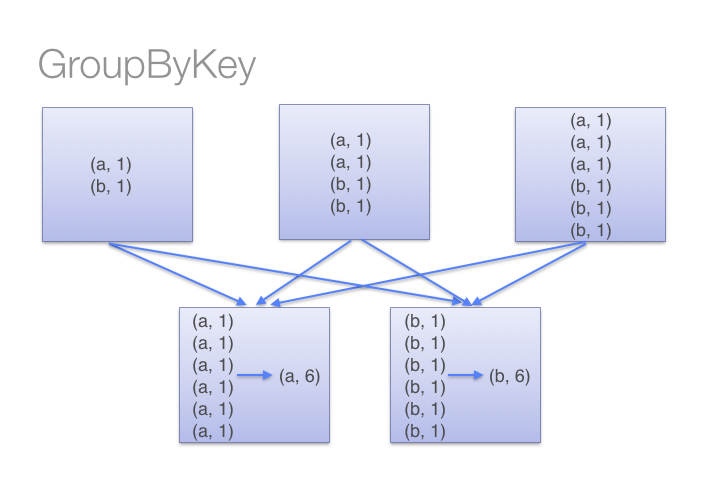

In [61]:
from IPython.display import Image
Image(filename = "groupByKey.png",width=500,height=500)

In [67]:

rdd1 = sc.parallelize([('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)])
print(rdd1.collect())
print(rdd1.groupByKey().mapValues(lambda x: list(x)).collect())
print(rdd1.groupByKey().mapValues(lambda x: sum(x)).collect())

[('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)]
[('a', [1, 1, 1, 1, 1, 1]), ('b', [1, 1, 1, 1, 1, 1])]
[('a', 6), ('b', 6)]


# reduceByKey

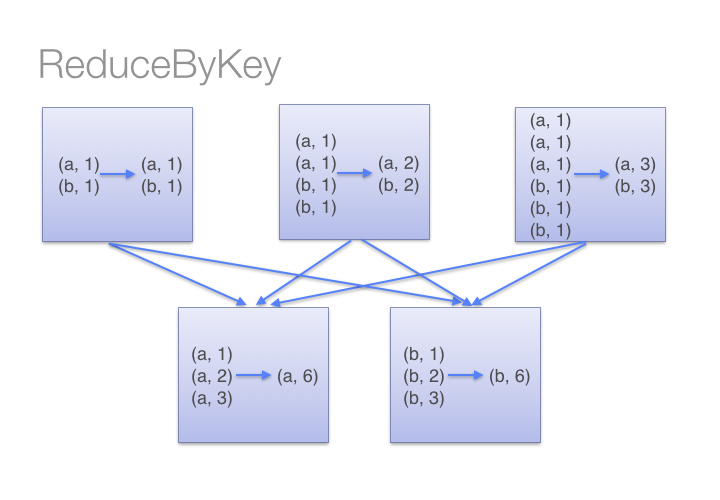

In [68]:
from IPython.display import Image
Image(filename = "reduceByKey.png",width=500,height=500)

In [69]:
from operator import add
rdd1 = sc.parallelize([('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)])
print(rdd1.collect())
print(rdd1.reduceByKey(add).collect())

[('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)]
[('a', 6), ('b', 6)]


# sortByKey

In [72]:
rdd1 = sc.parallelize([('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)])
print(rdd1.collect())
print(rdd1.sortByKey().collect())

[('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)]
[('a', 1), ('a', 1), ('a', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1), ('b', 1), ('b', 1), ('b', 1)]


# combineByKey

In [81]:
rdd1 = sc.parallelize([('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)])
print(rdd1.collect())
#print(rdd1.combineByKey().collect())
print(rdd1.combineByKey(lambda value: (value, 1),
              lambda x, value: (x[0] + value, x[1] + 1),
              lambda x, y: (x[0] + y[0], x[1] + y[1])).collect())

[('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)]
[('a', (6, 6)), ('b', (6, 6))]


# aggregateByKey

In [78]:
rdd1 = sc.parallelize([('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)])
print(rdd1.collect())
seqOp = (lambda x, y: (x[0] + y, x[1] + 1))
combOp = (lambda x, y: (x[0] + y[0], x[1] + y[1]))
print(rdd1.aggregateByKey((0, 0), seqOp, combOp).collect())

[('a', 1), ('b', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('a', 1), ('a', 1), ('a', 1), ('b', 1), ('b', 1), ('b', 1)]
[('a', (6, 6)), ('b', (6, 6))]


# subtract

In [84]:
x = sc.parallelize([("a", 1), ("b", 4), ("b", 5), ("a", 3)])
y = sc.parallelize([("a", 3),("b", 4)])
x.subtract(y).collect()

[('a', 1), ('b', 5)]

# subtractByKey

In [87]:
x = sc.parallelize([("a", 1), ("b", 4), ("b", 5), ("a", 2), ("c", 6)])
y = sc.parallelize([("a", 3), ("b", 9)])
x.subtractByKey(y).collect()

[('c', 6)]

# sampleByKey

In [104]:
fractions = {"a": 0.5, "b": 0.7}
rdd = sc.parallelize(fractions.keys()).cartesian(sc.parallelize(range(0, 5)))
print(rdd.collect())
print(rdd.sampleByKey(False, fractions, 1).collect())

[('a', 0), ('b', 0), ('a', 1), ('a', 2), ('b', 1), ('b', 2), ('a', 3), ('a', 4), ('b', 3), ('b', 4)]
[('a', 0), ('a', 1), ('b', 2), ('a', 3), ('b', 3), ('b', 4)]


# foldByKey

In [105]:
rdd1 = sc.parallelize([("a", 10), ("b", 1), ("a", 4), ("a", 5)])
from operator import add
sorted(rdd1.foldByKey(0, add).collect())

[('a', 19), ('b', 1)]

# zip

In [107]:
x = sc.parallelize([1,2,3])
y = sc.parallelize([4,5,6])
x.zip(y).collect()

[(1, 4), (2, 5), (3, 6)]